# Location Decision in Logistics

In [ ]:
# Import necessary packages
!pip3 install pulp
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# import the data that contains the latitude and longitude information of
# each college and the pizza store
Cambridge = pd.read_excel('Cambridge.xlsx', index_col="College" )
Cambridge

,Latitude,Longitude,The Pizza Store,Wolfson College,Christ's College,Churchill College,Clare College,Clare Hall,Corpus Christi College,Darwin College,...,Peterhouse,Queens' College,Robinson College,Selwyn College,Sidney Sussex College,St Catharine's College,St Edmund's College,St John's College,Trinity College,Trinity Hall
College,,,,,,,,,,,,,,,,,,,,,
The Pizza Store,52.203982,0.118100,0.0000,1.2850,0.3906,1.6080,0.23540,0.9359,0.11630,0.4828,...,0.3709,0.3410,0.9429,0.9034,0.4285,0.14010,1.1650,0.5737,0.4758,0.28490
Wolfson College,52.199085,0.101017,1.2850,0.0000,1.6650,1.5660,1.17400,0.6183,1.22800,0.8741,...,1.1780,0.9637,0.6913,0.3925,1.6380,1.16900,1.6100,1.4300,1.2080,1.21700
Christ's College,52.206260,0.122464,0.3906,1.6650,0.0000,1.7200,0.51320,1.2530,0.48250,0.8702,...,0.6910,0.7316,1.2430,1.2770,0.1766,0.52640,1.1800,0.5869,0.6399,0.50250
Churchill College,52.213150,0.099859,1.6080,1.5660,1.7200,0.0000,1.37400,1.0360,1.67300,1.6770,...,1.8660,1.5910,0.9613,1.3890,1.5590,1.62900,0.6089,1.1340,1.1350,1.32400
Clare College,52.205106,0.115172,0.2354,1.1740,0.5132,1.3740,0.00000,0.7420,0.30390,0.5090,...,0.5350,0.3565,0.7373,0.7819,0.4638,0.27220,0.9563,0.4052,0.2516,0.07566
Clare Hall,52.204251,0.104373,0.9359,0.6183,1.2530,1.0360,0.74200,0.0000,0.93320,0.7461,...,1.0190,0.7281,0.0784,0.3532,1.1740,0.87200,0.9926,0.8723,0.6717,0.75270
Corpus Christi College,52.202943,0.117899,0.1163,1.2280,0.4825,1.6730,0.30390,0.9332,0.00000,0.3901,...,0.2558,0.2653,0.9497,0.8570,0.5402,0.06239,1.2560,0.6775,0.5552,0.36810
Darwin College,52.200632,0.113592,0.4828,0.8741,0.8702,1.6770,0.50900,0.7461,0.39010,0.0000,...,0.3084,0.1546,0.7921,0.5439,0.9044,0.34410,1.3880,0.9063,0.7087,0.58260
Downing College,52.200948,0.125807,0.6242,1.7020,0.6331,2.2290,0.85970,1.5060,0.58280,0.8332,...,0.5252,0.7872,1.5280,1.3730,0.8018,0.64020,1.7530,1.1440,1.0940,0.90480


In [ ]:
# Plotting Cambridge colleges on map
cam = plt.imread('Cam.JPG')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude,
           zorder=1, c='#0072ce', s=50)
# Plot the pizza store
ax.scatter(Cambridge.iloc[-1].Longitude,
           Cambridge.iloc[-1].Latitude,  marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.0728, 0.1509)
ax.set_ylim(52.18, 52.2324)
ax.imshow(cam,extent=(0.0728,0.1509,52.18,52.2324),aspect='equal')
ax.grid(False)

FileNotFoundError: [Errno 2] No such file or directory: 'Cam.JPG'

In [ ]:
# First, let us try to solve the routing problem using MTZ formulation.
# Number of Vehicles available for pizza delivery
v = 1   # When vehicle number is 1, it is identical to the TSP

# Define Colleges
colleges = list(Cambridge.index)
colleges

# Initialise the VRP model
VRP = LpProblem("VRP", sense=LpMinimize)

# Define Decision Variables
X = LpVariable.dicts('X', [(i, j)
                           for i in colleges for j in colleges],
                     cat='Binary')

# Auxiliary variables for subtours elimination
U = LpVariable.dicts('U', [i for i in colleges],
                     lowBound=1, upBound=len(colleges), cat='Integer')

# Define Objective
VRP += lpSum([Cambridge.loc[i, j] * X[(i, j)]
              for i in colleges for j in colleges])


# Define Constraints
for i in colleges:
    cap = v
    # Sum of departure cities
    VRP += lpSum([X[(i, j)] for j in colleges if i != j]) == cap
    # Sum of arrival cities
    VRP += lpSum([X[(j, i)] for j in colleges if i != j]) == cap

# Eliminate Subtours
N = len(colleges)/v
for i in colleges:
    for j in colleges:
        if i != j and (i != 'The Pizza Store' and j != 'The Pizza Store'):
            VRP += U[i] - U[j] <= (N)*(1-X[(i, j)]) - 1


# Solve Model
VRP.solve()
print(LpStatus[VRP.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/u2272467/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_m/w8hl36l507n6lhzllv70cl4m0000gq/T/198ac5dbe948491db3917d9e50a0cfb2-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/_m/w8hl36l507n6lhzllv70cl4m0000gq/T/198ac5dbe948491db3917d9e50a0cfb2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 999 COLUMNS
At line 8812 RHS
At line 9807 BOUNDS
At line 10862 ENDATA
Problem MODEL has 994 rows, 1023 columns and 4774 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13.3565 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 930 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 930 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 930 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 

In [ ]:
# Define edges
edges = [(i, j) for (i, j) in X if value(X[(i, j)])
         != 0 and value(X[(i, j)]) != None]

# Define a function to get the sequence of the route
def get_route (start):
    route = [start]
    edge = edges.copy()
    found = True
    while found:
        found = False
        for (i, j) in edge:
            if i == route[-1]:
                route.append(j)
                edge.remove((i,j))
                found = True

    return route

In [ ]:
route = get_route('The Pizza Store')
print(' -> '.join([r for r in route]))

The Pizza Store -> King's College -> Clare College -> Trinity Hall -> Trinity College -> St John's College -> Magdalene College -> Lucy Cavendish -> St Edmund's College -> Murray Edwards College -> Fitzwilliam College -> Girton College -> Churchill College -> Robinson College -> Clare Hall -> Selwyn College -> Wolfson College -> Newnham College -> Darwin College -> Queens' College -> St Catharine's College -> Corpus Christi College -> Pembroke College -> Peterhouse -> Homerton College -> Hughes Hall -> Downing College -> Emmanuel College -> Christ's College -> Jesus College -> Sidney Sussex College -> Gonville & Caius College -> The Pizza Store


In [ ]:
# Print the optimized solution
print("The minimized travel distance is {0:.3f} km".\
      format(value(VRP.objective)))

The minimized travel distance is 15.477 km


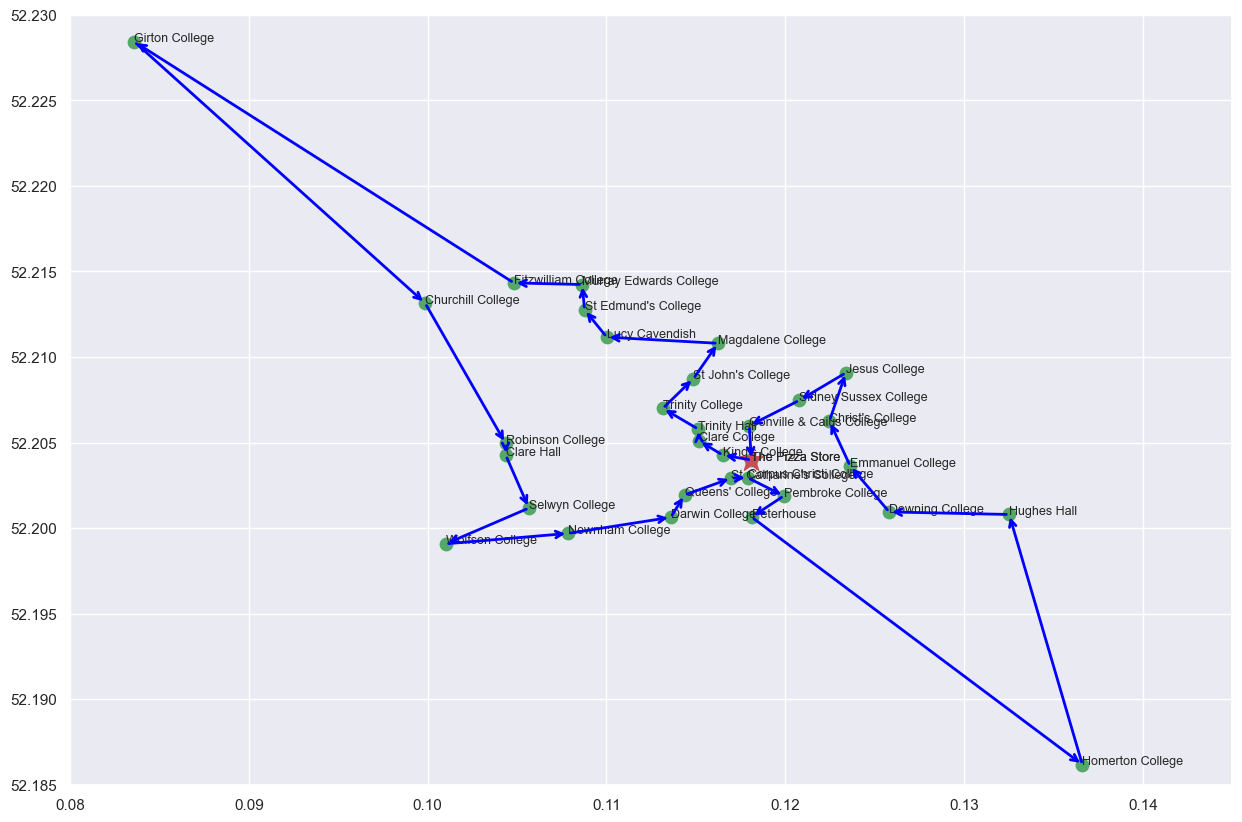

In [ ]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude,
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

# Set annotation
for txt in route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude),size=9)

# Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in edges:
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-",
                                            color='blue', lw=2))

## Nearest Neighbour

In [ ]:
def get_nearest_neighbour(unvisited):
    current = 'The Pizza Store'  # starting point
    NN_path = []
    while True:
        NN_path.append(current)
        unvisited.remove(current)
        if not unvisited:
            break

#idxmin()returns the index of the minimum value of the dataframe
        current = Cambridge.loc[unvisited, current].idxmin()
    NN_path.append('The Pizza Store')
    return NN_path

In [ ]:
route = get_nearest_neighbour(list(Cambridge.index))
route

['The Pizza Store',
 "King's College",
 'Clare College',
 'Trinity Hall',
 'Trinity College',
 "St John's College",
 'Magdalene College',
 'Lucy Cavendish',
 "St Edmund's College",
 'Murray Edwards College',
 'Fitzwilliam College',
 'Churchill College',
 'Robinson College',
 'Clare Hall',
 'Selwyn College',
 'Newnham College',
 'Darwin College',
 "Queens' College",
 "St Catharine's College",
 'Corpus Christi College',
 'Pembroke College',
 'Peterhouse',
 'Emmanuel College',
 "Christ's College",
 'Sidney Sussex College',
 'Gonville & Caius College',
 'Jesus College',
 'Downing College',
 'Hughes Hall',
 'Homerton College',
 'Wolfson College',
 'Girton College',
 'The Pizza Store']

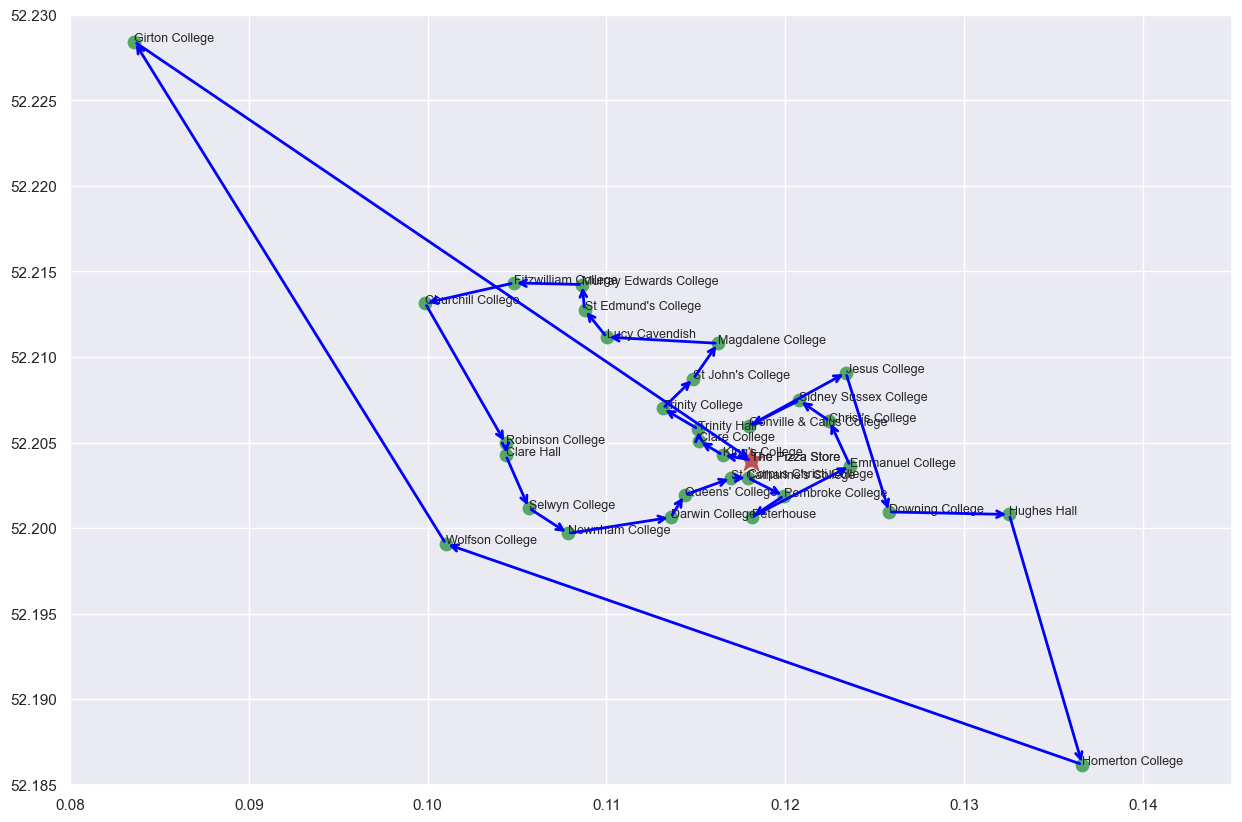

In [ ]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude,
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

for txt in route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=9)

#Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in zip(route, route[1:]):
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-",
                                            color='blue', lw=2))

In [ ]:
# Helper function
travel_distance = lambda route: sum(Cambridge.loc[i, j]
                                    for i, j in zip(route, route[1:]))

print('Total travel distance is {0:.3f} km'.\
      format(travel_distance(route)))

Total travel distance is 19.852 km


## 2-opt Heuristic

In [ ]:
def two_opt(route):
    best = route
    found = True
    while found:
        found = False
        # i starts at index location 1, as 0 is where the trip begins
        for i in range(1, len(route)-2):
            for j in range(i+1, len(route)):
                if j-i == 1: continue
                new_route = route.copy()
                new_route[i:j] = route[j-1:i-1:-1]  # 2-opt swap
                # compare the total travel distance
                if travel_distance(new_route) < travel_distance(best):
                    best = new_route
                    found = True
        route = best
    return best

In [ ]:
two_opt_route = two_opt(route)

NameError: name 'two_opt' is not defined

In [ ]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude,
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)


for txt in two_opt_route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=9)


#Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in zip(two_opt_route, two_opt_route[1:]):
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-", color='blue', lw=2))

In [ ]:
print('The improved travel distance with 2-opt heuristic is {0:.3f} km'.\
      format(travel_distance(two_opt_route)))